# Curso de PostgreSQL

- PLSQL
- Triggers
- Replicas

Postgres SQL es un motor, y PostgreSQL se considera un RDBMS significa Relational Database Management System o sistema manejador de bases de datos relacionales. Es un programa que se encarga de seguir las reglas de Codd y se puede utilizar de manera programática.

Existen 3 conceptos importantes entorno a las bases de datos:

1. El lenguaje
2. El motor
3. El servidor

PostgreSQL es Open Source esto quiere que es de código abierto y a su vez tiene una comunidad que constantemente le está haciendo mantenimiento y actualizando su código

PgSQL posee servicios de PostGIS y PL/PgSQL, son los servicios de desarrollo interno. El primero es un servicio de geolocalización que tiene que ver con mapas, puntos y esto te libra usar software de terceros. El segundo te permite desarrollar funciones Backend en el motor.

Estandar ACID

Reglas de buenas practicas para las bases de datos.

- A: Atomicity – Atomicidad -> Separar las funciones desarrolladas en la BD como pequeñas tareas y ejecutarlas como un todo. Si alguna tarea falla se hace un rollback(Se deshacen los cambios)
- C: Consistency – Consistencia -> Todo lo que se desarrolló en base al objeto relacional. Los datos tienen congruencia
- I: Isolation – Aislamiento -> Varias tareas ejecutándose al mismo tiempo dentro de la BD
- D: Durability – Durabilidad -> Puedes tener seguridad que la información no se perderá por un fallo catastrófico. PostgreSQL guarda la información en una Bitácora


## Por qué PostgreSQL

- Tipos de Datos
- Integridad de Datos
- Concurrencia. Rendimiento
- Fiabilidad, recuperación ante desastres
- Seguridad
- Extensibilidad
- Internacionalización, Búsqueda de texto.

## Instalación y configuración de la Base de Datos

Vamos a instalar PostgreSQL en nuestra computadora. A continuación veremos el paso a paso y algunos consejos útiles para instalar y configurar correctamente PostgreSQL en nuestro equipo.

1. Primer paso: ir a https://www.postgresql.org/.
2. Hacer clic en el botón ‘Download’ (Descarga)
3. Seleccionamos la opción que corresponda con el sistema operativo

Es altamente recomendable seleccionar la penúltima o antepenúltima versión. Si bien la última versión estable está disponible, en éste caso la 12.0, no es recomendable instalarla en nuestro equipo, ya que al momento de instalarla o usar un servicio en la Nube para Postgres, lo más seguro es que no esté disponible y sólo esté hasta la versión 11.5, que no es la última versión. Esto porque todos los proveedores de Infraestructura no disponen de la versión de Postgres más actual siempre (tardan un poco en apropiar los nuevos lanzamientos).

Si tienes un equipo con Linux, la instalación la puedes hacer directamente desde los repositorios de Linux, EDB ya no ofrece soporte para instaladores en Linux debido a que se ha vuelto innecesario, el repositorio de Linux con PostgreSQL ofrece una manera mucho más sencilla y estándar para instalar PostgreSQL en linux.

Vamos a buscar el programa PgAdmin, el cual usaremos como editor favorito para ejecutar en él todas las operaciones sobre nuestra base de datos.

También vamos a buscar la consola… Tanto la consola como PgAdmin son útiles para gestionar nuestra base de datos, una nos permite ingresar comando por comandos y la otra nos ofrece una interfaz visual fácil de entender para realizar todas las operaciones.

### Configuracion

Ahora vamos a crear una base de datos de prueba usando la consola y comprobaremos si existe usando PgAdmin, la crearemos para validar que la conexión con el servicio de base de datos interno funciona correctamente.

Para ello abrimos la consola, buscamos SQL Shell y lo ejecutamos. 

Lo que vemos en pantalla es la consola esperando que ingresemos cada parámetro para la conexión.

Primero está el nombre del parámetro. En éste caso es “Server” seguido de unos corchetes que contienen el valor predeterminado. Si presionamos “Enter” sin digitar nada la consola asumirá que te refieres al valor predeterminado, si en éste caso presionamos “Enter” el valor asumido será “Localhost”. Localhost se refiere a nuestra propia máquina, si instalaste la base de datos en el mismo pc que estás usando para la consola, el valor correcto es Localhost o 127.0.0.1 (representan lo mismo).

Podemos dejar todos los valores predeterminados (presionando “Enter”) hasta que la consola pregunte por la clave del usuario maestro.

Debemos ingresar la clave que usamos cuando estábamos instalando Postgres, de lo contrario no podremos acceder. Presionamos Enter y veremos a continuación una pantalla que nos indica que estamos logueados en la base de datos y estamos listos para hacer modificaciones.

De manera predeterminada, la base de datos instalada es Postgres, la cual no debemos tocar, ya que ejecuta funciones propias del motor. Es usada por el Motor de PostgreSQL para interactuar con todas las bases de datos que vayamos a crear en el futuro.

La siguiente imagen indica que estamos conectados a la base de datos Postgres. Vamos a crear una base de datos nueva y luego saltar el cursor a ésta base de datos recién creada.

#### Para ello escribimos el comando “CREATE DATABASE transporte_publico;” y presionamos “Enter”. 

El mensaje “CREATE DATABASE” justo después de la línea que acabamos de escribir indica que la base de datos fue creada correctamente.

Para saltar a la base de datos recién creada ejecutamos el comando “\c transporte_publico”

Ahora vamos a validar desde PgAdmin que la base de datos fué creada correctamente. Abrimos PgAdmin y nos encontramos con una lista de items a la izquierda, lo que significa que de manera predeterminada PgAdmin ha creado un acceso a nuestra base de datos local, el cual llamó “PostgreSQL 11”:

Al hacer hacer doble clic sobre éste elemento (“PostgreSQL 11”) nos pedirá ingresar la clave que hemos determinado para el super usuario postgres, al igual que la consola, hasta no ingresarla correctamente no nos podremos conectar

Ingresamos la clave. Te recomiendo seleccionar la opción “Save Password” o “Guardar Contraseña”. Si la máquina sobre la que estás trabajando es de confianza, que seas sólo tú o tu equipo quien tenga acceso a ella, de lo contrario, no guardes la contraseña para mantenerla segura.

Veremos la lista de bases de datos disponibles, la predeterminada “postgres” y la que acabamos de crear usando la consola, lo que comprueba que la base de datos y la consola funcionan correctamente.

Ahora procedemos a eliminar la base de datos recién creada para comprobar que PgAdmin está correctamente configurada y si pueda realizar cambios sobre la base de datos.

Para ello hacemos clic derecho sobre el elemento “transporte_publico” y seleccionamos la opción “Delete/Drop”. Al mensaje de confirmar hacemos clic en OK.

Con ello, si el elemento “transporte_publico” desaparece del menú de la izquierda comprobamos que PgAdmin funcionan correctamente.

```
# Debian
sudo apt-get update && apt-get upgrade

# Instalar motor de bases de datos
sudo apt-get install postgresql postgresql-client postgresql-contrib libpq-dev

# Acceso de usuario, desde la cuenta de root
su -
su - postgres

# Crear usuario y base de datos
createuser --interactive
    role? -> usuario
    superuser?

psql
    # \password usuario
    # \q
    
createdb nom_bbdd
	
# Fedora
dnf install postgresql-server postgresql-contrib

postgresql-setup initdb

systemctl enable postgresql.service
systemctl start postgresql.service

# Crear un usuario administrador
createuser -s -P -e nom_usuario
```

## Comandos Basicos

Existen dos formas de acceder al motor de bases de datos de PostgreSQL y es por:

1. Consola
2. PgAdmin que es el entorno gráfico

Lo primero que va a pedir son las credenciales de acceso, se debe tomar en cuenta que los valores entre corchetes son los valores por defecto de conexión, sí tenemos algún otro servicio al cual queremos acceder debemos indicarlo de lo contrario dejarlo tal cual.

Una de las instrucciones más importante que veremos será los comando con "\"sí deseamos ver más como usarlo y ver otras instrucciones podemos digitar "\?".


```
\c: nombre_bd (Es como si fuera el use DB)
\l: Muestra todas las bases de datos (ele minúscula)
\dt: muestra las tablas de la base de datos
\d tabla: muestra los detalles de la tabla
\h: ayuda para comandos de SQL
\h palabra_sql: Muestra cómo usar la función
Ctrl + c: cancela lo que se estaba mostrando
\g: permite volver a ejecutar la función que acabas de ejecutar en la consola
\timing: permite activar el contador de tiempo para así saber cuánto se demora una respuesta
SELECT version(): Con esta instrucción se puede saber la versión con la cual se está trabajando en PostgreSQL.
```

## PgAdmin

```
# Importamos la llave del repositorio
wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | sudo apt-key add -

# Añadimos el repositorio
RELEASE=$(lsb_release -cs)
echo "deb http://apt.postgresql.org/pub/repos/apt/ ${RELEASE}"-pgdg main | sudo tee  /etc/apt/sources.list.d/pgdg.list

# Actualizamos e instalamos
apt-get update
apt-get -y install pgadmin4 pgadmin4-apache2

sudo ufw allow http
sudo ufw allow https

http://localhost/pgadmin4
```

## Archivos de Configuracion

Existen tres archivos importantes para realizar configuraciones extras, los archivos de configuración son tres principales:

- `postgreql.conf:` En este fichero podemos cambiar los parámetros de PostgreSQL por ejemplo en la sección Connection Settings se cambia las conexiones máxima, el socket cuales IP le podemos dar acceso. Este un archivo que básicamente se rige por para Key=valor
    
    
- `pg.hba.conf:` Roles y tipos de acceso a la base de datos.
    - `METHOD = trust:` Esto sirve para que los usuarios desde cierto pool de ip no tenga que autenticarse.
    - `METHOD = deny:` Sirve para denegar a una ip específica o servicio que se deniega el acceso. Esto es muy funcional para un servicio maligno.

- `pg_ident.conf:` Específicamente esto nos sirve para mapear usuarios. Esto es funcional para darle permisos a una cuenta local de equipo permisos de administrador

La ruta de los mismos depende del sistema Operarivo, para saber que que ruta estan, basta con hacer una Query

```mysql
SHOW config_file;
```

NOTA: siempre es bueno hacer una copia original de los archivos antes de modificarlos por si movemos algo que no debemos.

## Comandos más utilizados en PostgreSQL

### La Consola

La consola en PostgreSQL es una herramienta muy potente para crear, administrar y depurar nuestra base de datos. podemos acceder a ella después de instalar PostgreSQL y haber seleccionado la opción de instalar la consola junto a la base de datos.

PostgreSQL está más estrechamente acoplado al entorno UNIX que algunos otros sistemas de bases de datos, utiliza las cuentas de usuario nativas para determinar quién se conecta a ella (de forma predeterminada). El programa que se ejecuta en la consola y que permite ejecutar consultas y comandos se llama psql, psql es la terminal interactiva para trabajar con PostgreSQL, es la interfaz de línea de comando o consola principal, así como PgAdmin es la interfaz gráfica de usuario principal de PostgreSQL.

Después de emitir un comando PostgreSQL, recibirás comentarios del servidor indicándote el resultado de un comando o mostrándote los resultados de una solicitud de información. Por ejemplo, si deseas saber qué versión de PostgreSQL estás usando actualmente, puedes hacer lo siguiente:

```
SELECT VERSION();
```

#### Comandos de ayuda

En consola los dos principales comandos con los que podemos revisar el todos los comandos y consultas son:

- `\?` Con el cual podemos ver la lista de todos los comandos disponibles en consola, comandos que empiezan con backslash ()
- `\h` Con este comando veremos la información de todas las consultas SQL disponibles en consola. Sirve también para buscar ayuda sobre una consulta específica, para buscar información sobre una consulta específica basta con escribir \h seguido del inicio de la consulta de la que se requiera ayuda, así: \h ALTER

De esta forma podemos ver toda la ayuda con respecto a la consulta ALTER

#### Comandos de navegación y consulta de información

- `\c` Saltar entre bases de datos
- `\l` Listar base de datos disponibles
- `\dt` Listar las tablas de la base de datos
- `\d <nombre_tabla>` Describir una tabla
- `\dn` Listar los esquemas de la base de datos actual
- `\df` Listar las funciones disponibles de la base de datos actual
- `\dv` Listar las vistas de la base de datos actual
- `\du` Listar los usuarios y sus roles de la base de datos actual

#### Comandos de inspección y ejecución

- `\g` Volver a ejecutar el comando ejecutando justo antes
- `\s` Ver el historial de comandos ejecutados
- `\s <nombre_archivo>` Si se quiere guardar la lista de comandos ejecutados en un archivo de texto plano
- `\i <nombre_archivo>` Ejecutar los comandos desde un archivo
- `\e` Permite abrir un editor de texto plano, escribir comandos y ejecutar en lote. \e abre el editor de texto, escribir allí todos los comandos, luego guardar los cambios y cerrar, al cerrar se ejecutarán todos los comandos guardados.
- `\ef` Equivalente al comando anterior pero permite editar también funciones en PostgreSQL

#### Comandos para debug y optimización

- `\timing` Activar / Desactivar el contador de tiempo por consulta

#### Comandos para cerrar la consola

- `\q` Cerrar la consola

#### Ejecutando consultas en la base de datos usando la consola

De manera predeterminada PostgreSQL no crea bases de datos para usar, debemos crear nuestra base de datos para empezar a trabajar, verás que existe ya una base de datos llamada postgres pero no debe ser usada ya que hace parte del CORE de PostgreSQL y sirve para gestionar las demás bases de datos.

Para crear una base de datos debes ejecutar la consulta de creación de base de datos, es importante entender que existe una costumbre no oficial al momento de escribir consultas; consiste en poner en mayúsculas todas las palabras propias del lenguaje SQL cómo CREATE, SELECT, ALTE, etc y el resto de palabras como los nombres de las tablas, columnas, nombres de usuarios, etc en minúscula. No está claro el porqué de esta especie de “estándar” al escribir consultas SQL pero todo apunta a que en el momento que SQL nace, no existían editores de consultas que resaltaran las palabras propias del lenguaje para diferenciar fácilmente de las palabras que no son parte del lenguaje, por eso el uso de mayúsculas y minúsculas.

Las palabras reservadas de consultas SQL usualmente se escriben en mayúscula, ésto para distinguir entre nombres de objetos y lenguaje SQL propio, no es obligatorio, pero podría serte útil en la creación de Scripts SQL largos.

Vamos ahora por un ligero ejemplo desde la creación de una base de datos, la creación de una tabla, la inserción, borrado, consulta y alteración de datos de la tabla.

Primero crea la base de datos, ```CREATE DATABASE transporte;``` sería el primer paso.

Ahora saltar de la base de datos postgres que ha sido seleccionada de manera predeterminada a la base de datos transporte recién creada utilizando el comando `\c transporte`.

Ahora vamos a crear la tabla tren, el SQL correspondiente sería:

```mysql
CREATE TABLE tren ( id serial NOT NULL, modelo character varying, capacidad integer, CONSTRAINT tren_pkey PRIMARY KEY (id) );
```

La columna id será un número autoincremental (cada vez que se inserta un registro se aumenta en uno), modelo se refiere a una referencia al tren, capacidad sería la cantidad de pasajeros que puede transportar y al final agregamos la llave primaria que será id.

Ahora que la tabla ha sido creada, podemos ver su definición utilizando el comando `\d tren`

PostgreSQL ha creado el campo id automáticamente cómo integer con una asociación predeterminada a una secuencia llamada ‘tren_id_seq’. De manera que cada vez que se inserte un valor, id tomará el siguiente valor de la secuencia, vamos a ver la definición de la secuencia. Para ello, `\d tren_id_seq` es suficiente:

Vemos que la secuencia inicia en uno, así que nuestra primera inserción de datos dejará a la columna id con valor uno.

```mysql
INSERT INTO tren( modelo, capacidad ) VALUES (‘Volvo 1’, 100);
```

Consultamos ahora los datos en la tabla:

```mysql
SELECT * FROM tren;
```

Vamos a modificar el valor, establecer el tren con id uno que sea modelo Honda 0726. Para ello ejecutamos la consulta tipo `UPDATE tren SET modelo = 'Honda 0726' Where id = 1;`

Verificamos la modificación `SELECT * FROM tren;`

Ahora borramos la fila: `DELETE FROM tren WHERE id = 1;`

Verificamos el borrado `SELECT * FROM tren;`

El borrado ha funcionado tenemos 0 rows, es decir, no hay filas. Ahora activemos la herramienta que nos permite medir el tiempo que tarda una consulta `\timing`

Probemos cómo funciona al medición realizando la encriptación de un texto cualquiera usando el algoritmo md5:

```
SELECT MD5("Vamos a encriptar un texto como el que lees");

La consulta tardó 10.011 milisegundos
```
Ahora que sabes como manejar algunos de los comandos más utilizados en PostgreSQL es momento de comenzar a practicar!!!

## Tipos de datos

### Principales:

- Numéricos(Numeros enteros, Numeros Decimales, Seriales)
- Monetarios(cantidad de moneda)
- Texto(almacenar cadenas y texto, existen tres VARCHAR, CHAR, TEXT)
- Binario(1 Y 0)
- Fecha/Hora(Para almacenar Fechas y/o Horas, DATE TYPE, TIME TYPE, TIMESTAMP, INTERVAL)
- Boolean(Verdadero o Falso)

### Especiales propios de postgres

- Geométricos: Permiten calcular distancias y áreas usando dos valores X y Y.
- Direcciones de Red: Cálculos de máscara de red
- Texto tipo bit: Cálculos en otros sistemas, ejm(hexadecimal, binario)
- XML, JSON: Postgres nos permite guardar en estos formatos
- Arreglos: Vectores y Matrices

- Es buena práctica al modelar, saber cuales son nuestras relaciones(tablas o entidades) y para ello pensamos en cuales son los objetos tangibles en nuestro contexto de problema

- Es buena práctica antes de sentarnos a crear tablas en nuestro modelo sentarnos a realizar el diseño y el proceso recomendado es este:

    - Modelo-Entidad Relación
    - Modelo Relacional (Modelo Físico)
    - Normalización de datos.

- Es buena práctica que: Los PRIMARY KEY (clave primaria) que se referencian en los FOREING KEY (clave foránea) de otras tablas deben ser del mismo tipos de datos

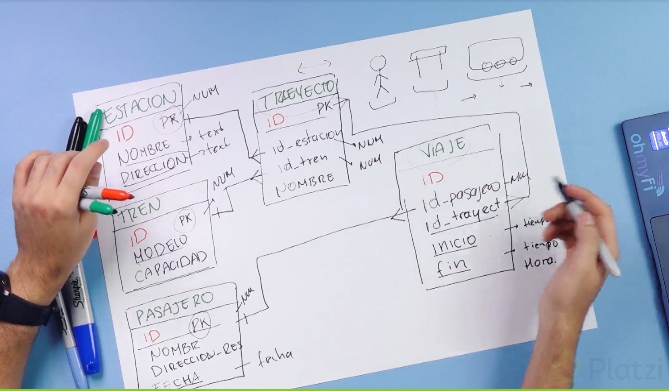

## Jerarquía de Bases de Datos

Toda jerarquía de base de datos se basa en los siguientes elementos:

- `Servidor de base de datos:` Computador que tiene un motor de base de datos instalado y en ejecución.
- `Motor de base de datos:` Software que provee un conjunto de servicios encargados de administrar una base de datos.
- `Base de datos:` Grupo de datos que pertenecen a un mismo contexto.
- `Esquemas de base de datos en PostgreSQL:` Grupo de objetos de base de datos que guarda relación entre sí (tablas, funciones, relaciones, secuencias).
- `Tablas de base de datos:` Estructura que organiza los datos en filas y columnas formando una matriz.

### PostgreSQL es un motor de base de datos.

La estructura de la base de datos diseñada para el reto corresponde a los siguientes elementos:

La base de datos se llama transporte, usaremos su esquema predeterminado public.

El esquema public contiene las siguientes tablas:

- Estación
- Pasajero
- Tren

Y las tablas de relaciones entre cada uno de los elementos anteriores son:

- Trayecto
- Viaje

El esquema relacional entre las tablas corresponde al siguiente diagrama:

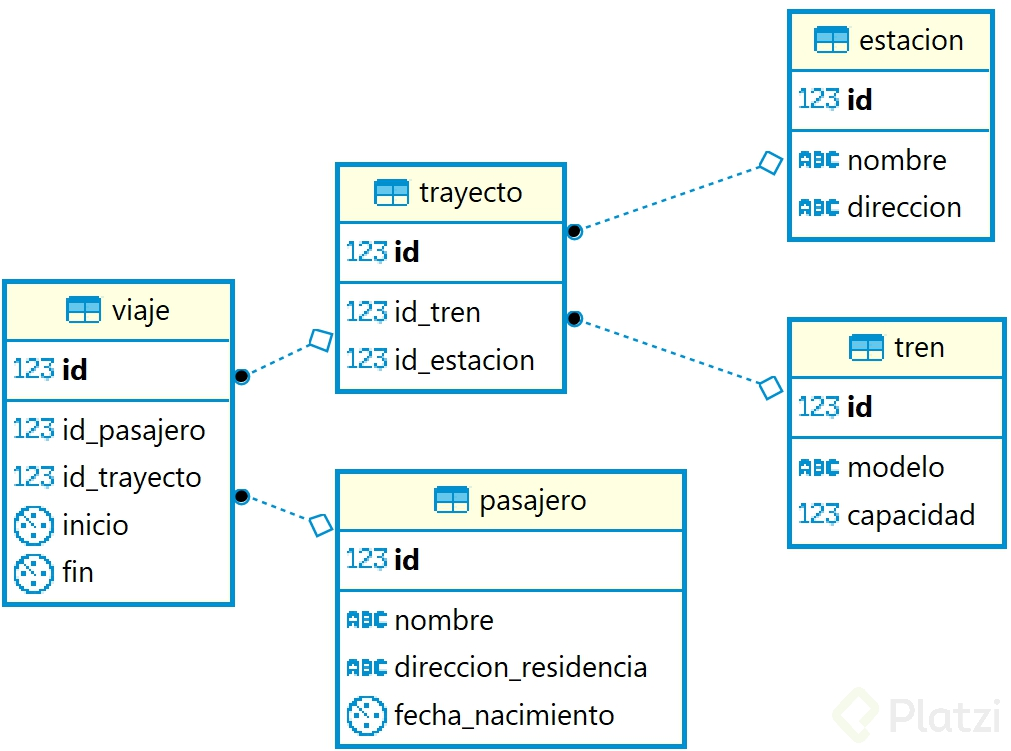

#### Estación
Contiene la información de las estaciones de nuestro sistema, incluye datos de nombre con tipo de dato texto y dirección con tipo de dato texto, junto con un número de identificación único por estación.

#### Tren
Almacena la información de los trenes de nuestro sistema, cada tren tiene un modelo con tipo de dato texto y una capacidad con tipo de dato numérico que representa la cantidad de personas que puede llevar ese tren, también tiene un ID único por tren.

#### Trayecto
Relaciona los trenes con las estaciones, simula ser las rutas que cada uno de los trenes pueden desarrollar entre las estaciones

#### Pasajero
Es la tabla que contiene la información de las personas que viajan en nuestro sistema de transporte masivo, sus columnas son nombre tipo de dato texto con el nombre completo de la persona, direccion_residencia con tipo de dato texto que indica dónde vive la persona, fecha_nacimiento tipo de dato texto y un ID único tipo de dato numérico para identificar a cada persona.

#### Viaje
Relaciona Trayecto con Pasajero ilustrando la dinámica entre los viajes que realizan las personas, los cuales parten de una estación y se hacen usando un tren.

## Tablas

Las tablas son el elemento que contienen la información y la estructura en nuestra base de datos. A pesar de que  tienen un funcionamiento complejo, las acciones que se puede realizar sobre ella son muy simples y es son: 

- CREATE (crear): Sirve para inicializar la estructura de datos (tabla) y en esta se declara el nombre de la tabla junto con los campos y sus tipos de datos.
- ALTER (alterar): Sirve para alterar o cambiar la estructura de una tabla incluyendo los CONSTRAINTS, Agregar o quitar columnas, cambiar índices, agregar llaves primarias e incluso agregar roles como propietarios de la tabla
- DROP (Eliminar): DROP simplemente nos permite borrar la tabla con toda su información.

Esto se conoce como DATA DEFINITION LENGUAJE.

```mysql
CREATE DATABASE transporte
    WITH 
    OWNER = esteban
    ENCODING = 'UTF8'
    CONNECTION LIMIT = -1;
```

Es buena práctica como se vio en los anteriores cursos es importante comenzar a crear las tablas que no tengan llaves foráneas.

La primera columna que necesita toda tabla es un ID y es buena práctica hacerla de tipo entero y que automáticamente incremente. El tipo de dato SERIAL en postgres es equivalente al AUTO_INCREMENT en MySQL. SERIAL es un integer por defecto.

En postgres character varying es equivalente al varchar de MySQL

En la pestaña constraints se puede crear la llaves primarias, llaves foraneas, check, Unique, Exclude

El estándar que usa postgres para nombrar los constraints de tipo primary key es: nombreCampo_pkey

```mysql
CREATE TABLE public.pasajero
(
    id serial,
    nombre character varying(100),
    direccion_res character varying,
    fecha date,
    CONSTRAINT pasajero_pkey PRIMARY KEY (id)
);

WITH ( OIDS = FALSE );

ALTER TABLE public.pasajero
    OWNER to esteban;
```

Para crear un Script de inserción hacemos clic derecho en la tabla y nos vamos a la opción Scripts y luego seleccionamos el ejemplo de Scripts que necesitamos.

SELECT current_date; sirve para saber el día que estamos actualmente pero también nos sirve para ver como postgres guarda la fecha en un campo con el tipo de datos Date.

```mysql
CREATE TABLE public.tren
(
    id serial,
    modelo character varying(50),
    capacidad integer,
    CONSTRAINT tren_pkey PRIMARY KEY (id)
)
WITH (
    OIDS = FALSE
);
ALTER TABLE public.tren
    OWNER to esteban;

CREATE TABLE public.estacion(
	id serial,
	nombre character varying(30),
	direccion character varying,
	CONSTRAINT estacion_pkey PRIMARY KEY (id)
)
WITH (
OIDS = FALSE );

ALTER TABLE public.estacion
OWNER to esteban;

CREATE TABLE public.trayecto(
	id serial,
	id_tren integer,
	id_estacion integer,
	CONSTRAINT trayecto_pkey PRIMARY KEY (id),
)
WITH (
OIDS = FALSE );

ALTER TABLE public.trayecto
OWNER to esteban;

CREATE TABLE public.viaje(
	id serial,
	id_pasajero integer,
	id_trayecto integer,
	inicio date,
	fin date,
	CONSTRAINT viaje_pkey PRIMARY KEY (id),
)
WITH (
OIDS = FALSE );

ALTER TABLE public.viaje
OWNER to esteban;
```

## Particiones

En ocasiones llega un punto en el que tienes mucha información en una sola tabla y el Particionamiento es la mejor opción. La partición se refiere a dividir lo que es lógicamente una tabla grande en piezas físicas más pequeñas.

Normalmente valdrán la pena solo cuando una tabla sería muy grande. El punto exacto en el que una tabla se beneficiará de la partición depende de la aplicación, aunque una regla general es que el tamaño de la tabla debe exceder la memoria física del servidor de la base de datos

La información de una tabla consultada corresponde a un espacio físico de memoria en del servidor. Como se dijo anteriormente una los factores que se le puede atribuir realizar el aplicar el criterio de partición a una tabla es que la data de la tabla exceda la memoria del SERVER

Las particiones consisten en:

1. Separación Física esto es guardar varias partes de la misma tabla en diferentes espacios de disco e incluso en otros discos

2. Conservar la Estructura Lógica esto es que se puede hacer el SELECT de la misma forma como se hacía anteriormente.

La tabla se divide internamente en pequeñas partes o tablas en rangos o listas definido, que pueden ser: fechas u objetos. Existen dos tipos de particiones Particionamiento de rango (Range Partitioning) y Particionamiento de lista (List Partitioning)

¿Cómo funciona una consulta? Sí se consulta sobre algún mes en específico en una tabla particionada en rangos de fechas entonces se dirige automáticamente a la partición que tiene el mes que deseamos consultar

Ventajas en general:

- Evita que la tabla se bloque por constantes consultas y modificaciones.
- Proceso de búsqueda e inserción es más eficiente.

RANGE: es una función para realizar rangos dinámicos sí estamos haciendo programación funcional.

Es importante recalcar que en la fecha final de nuestro rango de días el motor de bases de datos excluye el valor de nuestro último día es decir, si el mes termina en 31 entonces en nuestro rango debe terminar en 32

Creación de rango CREATE TABLE bitacora202001 PARTITION OF bitacora FOR VALUES FROM ('2020-01-01') TO ('2020-01-32');

La tabla particionada tiene un id pero no es primary key, ya que realmente estas hacen referencias a las tablas que si tienen las llaves primarias.

```mysql
CREATE TABLE public.bitacora_viaje
(
    id serial,
    id_viaje integer,
    fecha date
) PARTITION BY RANGE (fecha) ;

ALTER TABLE public.bitacora_viaje
    OWNER to esteban;
    
    
CREATE TABLE bitacora_viaje_201001 PARTITION OF bitacora_viaje FOR VALUES FROM ('2010-01-01') TO ('2010-01-31');
```

## Roles

PostgreSQL gestiona los permisos de acceso a la base de datos utilizando el concepto de roles (roles) . Un rol puede considerarse como un usuario de la base de datos o un grupo de usuarios de la base de datos

Los roles de la base de datos están conceptualmente completamente separados de los usuarios del sistema operativo. En la práctica, puede ser conveniente mantener una correspondencia, pero esto no es obligatorio

Los roles tienen atributos y privilegios; los atributos se pueden ver como ¿Cuál usuario se está conectando a la bases de datos? y los atributos se pueden visualizar como ¿Cuáles acciones pueden ejecutar el rol que se está conectando?

Cada conexión al servidor de la base de datos se realiza en nombre de algún rol en particular, y este rol determina los privilegios de acceso inicial para los comandos emitidos en esa conexión

Algunos de los privilegios de los roles son:

- SELECT
- INSERT
- UPDATE
- DELETE
- RULE
- REFERENCES
- TRIGGER

Algunos de los atributos:

- SUPERUSER
- CREATE ROLE
- DROP ROLE
- PASSWORD
- DATABASE CREATION

Los roles pueden ser agrupados en un conjuntos de privilegios o permisos.

Para arrancar el sistema de base de datos, un sistema recién inicializado siempre contiene un rol predefinido. Este rol es siempre un "superusuario" y, de manera predeterminada (a menos que se modifique al ejecutar initdb )

Es una buena práctica crear un rol que tenga los privilegios CREATEDB y CREATEROLE, pero que no sea un superusuario,y luego usar este rol para toda la administración de rutina de bases de datos y roles. Este enfoque evita los peligros de operar como superusuario cuando no se deba

Se puede crear los roles independiente a las bases de datos.

### Crear Role

\h CREATE ROLE, para ver como usar el comando.


Sin contraseña y con todas las caracteristicas predeterminadas

```mysql
CREATE ROLE usuario_consulta;
```

CREATE USER es un alias de CREATE ROL. Algo más para agregar para verificar sí un usuario a sido creado podemos utilizar la instrucción: 

`\dg`

Cambiar atributos o borrar roles

```mysql
ALTER ROLE usuario_consulta WITH LOGIN;
ALTER ROLE usuario_consulta WITH SUPERUSER;
ALTER ROLE usuario_consulta WITH PASSWORD 'etc123';
DROP ROLE usuario_consulta;
```

#### Desde PgAdmin

Para crear un rol:

- Realizamos clic derecho en la opción Login/Group Roles
- Create
- Login Role

En la Pestaña General tenemos el campo name dónde va el nombre del rol y podemos colocar un comentario.

Pestaña Definition se coloca la contraseña y también se puede agregar una fecha de expiración de la cuenta o también un limite de conexión.

En la pestaña **privilegios** van los atributos que llevará el rol, aquí tenemos que tener en cuenta que al dejar la opción de Ingerit right from parent esta opción permite consultar y modificar las tablas de la bd

En la pestaña **Membership** sirve para cuando hayamos creado un grupo de permisos y queremos hacer que este rol sea de ese grupo de permisos

En la pestaña **Parameters** podemos personalizar variables y atributos. Ejemplo podemos limitar la cantidad de memoria que va a usar la base de datos cuando él se conecte Si queremos que sea un usuario que de pronto no tenga el acceso al 100% de la CPU o al 100% la ram

En la pestaña **Security** se pueden asignar etiquetas a los roles para distinguir más fácilmente que roles tienen cierto grado de permisos y se haga más fácil el identificar por etiquetas.


```mysql
# Como usar el comando  CREATE ROL
\h CREATE ROLE  ;

# Crear un role
CREATE ROLE usuario_consulta;

# Consultar los usuarios dentro de la bases de datos;

/dg

# Modificar Role
ALTER ROLE  usuario_consulta WITH LOGIN;
ALTER ROLE  usuario_consulta WITH SUPERUSER;
ALTER ROLE  usuario_consulta WITH PASSWORD '1234';

# Eliminar usuario
DROP ROLE usuario_consulta;

CREATEROLE usuario_consulta WITH
  LOGIN
  NOSUPERUSER
  INHERIT
  NOCREATEDB
  NOCREATEROLE
  NOREPLICATION
  ENCRYPTED PASSWORD'md57d24e489563fca3e9842fd8407d58dbf';

# obtorgar privilegios
GRANT INSERT, SELECT, UPDATE ON TABLE public.estacion TO usuario_consulta;

GRANT INSERT, SELECT, UPDATE ON TABLE public.pasajero TO usuario_consulta;

GRANT INSERT, SELECT, UPDATE ON TABLE public.trayecto TO usuario_consulta;

GRANT INSERT, SELECT, UPDATE ON TABLE public.tren TO usuario_consulta;

GRANT INSERT, SELECT, UPDATE ON TABLE public.viaje TO usuario_consulta;
```

## Llaves Foraneas

Llaves foraneas consiste en la relacion que tenemos entre las tablas.

Estructura de las Foreing Keys es:

- Tabla_origen.campo_id_referencia
- Tabla_destino.campo_id_referenciado
- Acciones.

En la pestaña Definition de los constraints existen Características (Definitions) especiales al foreing Keys permite hacer una llave foránea sea validada al instante o después.

el nombre seria: origen_destino_fk

Opciones de las foreing Keys son:

- Deferreable (Aplazar validación)
- Deferred (Apenas se crea se válida)
- Match Type (SIMPLE=VALOR A VALOR OR FULL=COMPLEJA)
- Validated (Iniciamos las tablas con la validación)
- Auto FK Index (No es un indice de la tabla)

En la pestaña Action de los contraints es una pestaña en donde indicamos la acción a tomar por el motor de la base de dato cuando ocurre una actualización del registro de la tupla referenciada por este campo

```mysql
ALTER TABLE public.trayecto
    ADD CONSTRAINT trayecto_estacion_fk FOREIGN KEY (id_estacion)
    REFERENCES public.estacion (id) MATCH SIMPLE
    ON UPDATE CASCADE
    ON DELETE CASCADE
    NOT VALID;
```

## Inserción y consulta de datos

Para realizar un insert en nuestras tablas desde PgAdmin hacemos clic derecho en la **Tabla -> Script -> Insert Script**

Sí tenemos un ID serial, cuando tengamos insert podemos quitarlo del script insert porque el mismo motor de base de datos se encarga de asignar este número

Para modificar un tipo de dato en una columna se debe tomar en cuenta que el motor de BD nos dejará hacer el cambio por un tipo de dato equivalente. Sí se desea cambiar el tipo de dato por my distinto seguramente se tendrá que hacer un drop column y luego un add column

Se tiene dos tabla a y b. y tienen los atributos a.id y b.id y b.id_a que referencia al id de la tabla a. Debemos tomar en cuenta que no se pueden insertar id en el registros en la tabla b.id_a que no existan el tabla a.

Sí se hace una acción como: borrar, actualizar en una registro que está en la tabla a y la llave primaria de esa misma se referencia en otra tabla b, y tenemos la opción CASCADE está acción actualizará el registro que está relacionado por medio del id

```mysql
SELECT * FROM public.estacion;
SELECT * FROM public.pasajero;
SELECT * FROM public.trayecto;
SELECT * FROM public.tren;
SELECT * FROM public.viaje;

# Insert "estacion"
INSERT INTO public.estacion (nombre, direccion)
VALUES 
    ('Estación Centro','St 1# 12'),
    ('Estación Norte','St 100# 112')
;

# Insert "tren"
INSERT INTO public.tren (capacidad,modelo)
VALUES 
    (100,'Modelo 1'),
    (100,'Modelo 2')
;

# Insert "trayecto"
INSERT INTO public.trayecto (id_tren,id_estacion,nombre)
VALUES
    (1,1,'Ruta 1');
    (2,2,'Ruta 2');
;
    
# RETO
INSERT INTO public.pasajero (nombre,fecha,direccion_res)
VALUES
    ('José Ordoñez','1987-1-3','St 100# 12'),
    ('Ángel Quintero','1987-1-12','St 101# 12'),
    ('Rafel Castillo','1977-1-12','St 102# 12'),
;

INSERT INTO public.viaje (id_pasajero,id_trayecto,inicio,fin)
 VALUES
    (1,1,'2019-01-02','2019-01-02'),
    (2,1,'2019-01-03','2019-01-03'),
    (2,2,'2019-01-04','2019-01-04'),
    (3,2,'2019-01-04','2019-01-04')

;

# Delete sin limit
DELETE FROM public.estacion WHERE estacion.id = 4;

# Delete limit
DELETE FROM public.estacion WHERE estacion.id IN
     (
		SELECT id FROM public.estacion 
	  		WHERE estacion.id IN(3,4)
			ORDER BY estacion.id  
		 	LIMIT 2
	 )
;

# Update sin limit
UPDATE public.estacion
SET id=4, nombre='Estación SUR-OESTE', direccion='St 4# 1'
WHERE estacion.id = 4;

# Update utilizando limit
UPDATE public.estacion
	SET 
		id=4, 
		nombre='Estación SUR-OESTE', 
		direccion='St 4# 1'
	WHERE id IN (
		SELECT estacion.id FROM public.estacion
			WHERE estacion.id IN(4)
			ORDER BY estacion.id
			LIMIT1
	)
;

UPDATE public.estacion
	SET 
        id=4, 
        nombre='Estación SUR-OESTE', 
        direccion='St 4# 1'
        WHERE id IN (4)
;
```

## Insercion Masiva

Sitio para generar datos: [Mockaroo](mockaroo.com)

## SQL Joins

```mysql
# Estaciones en trayectos
SELECT * FROM estacion
JOIN trayecto On (trayecto.id_estacion = estacion.id)

# Trenes en trayectos
SELECT * FROM tren
JOIN  trayecto On (trayecto.id_tren = tren.id)
```

## Funciones Especiales

Existen 4 funciones especiales que nos ayudarán en nuestro día a día estas son:

- **ON CONFLICT DO:** permite realizar una actualización en un registro si este se encuentra, sí no se encuentra se insertará
- **RETURNING:** Evita realizar una consulta adicional en la base de datos para recopilar los datos CUANDO se realize un INSERT, UPDATE, DELETE, y es especialmente valioso cuando de otro modo sería difícil identificar las filas modificadas de manera confiable.
- **LIKE / ILIKE:** permite realizar búsquedas al estilo de expresiones regulares dónde podemos probar buscar nombres por un carácter en específico que comience, termine o se encuentre entre una cadena de carácteres.
- **IS / IS NOT:** nos permite comparar tipos de datos que no son estándar o son objetos.

```mysql
# ON CONCLICT  DO
SELECT * FROM estacion;

# ON CONFLICT DO NOTHING 
# Sí el registro existe, no hace nada pero sí  el registro  no existe lo crea
INSERT INTO public.estacion (id,nombre,direccion) 
VALUES (350,'xxx','xxx')
ON CONFLICT DO NOTHING;

SELECT * FROM estacion;

# ON CONFLICT DO UPDATE SET
# Sí el registro existe lo actuliza, sí no existe lo crea
INSERT INTO public.estacion (id,nombre,direccion) 
VALUES (350,'xxx','xxx')
ON CONFLICT (id) DO 
	UPDATE SET nombre = 'San francisco ', direccion = '46 howlang';
	
SELECT * FROM estacion;


# RETUNING 
# RETURNING * | RETURNING name_column
# Una vez insertamos el valor este no los devuelve muy útil para no usar un SELECT.
INSERT INTO public.estacion (nombre,direccion) 
VALUES ('New York Station',' 49 Muir Way')
RETURNING *

# LIKE / ILIKE
# La diferencia entre LIKE y ILIKE es que ILIKE busca sin importar mayusculas o minusculas
SELECT * FROM pasajero
WHERE nombre LIKE'o%';

SELECT * FROM pasajero
WHERE nombre ILIKE'o%';


# IS / IS NOT
# IS / IS NOT, nos permite comparar tipos de datos que no son estándar o son objetos.
# NULL es un tipo de dato NO ESTÁNDAR
SELECT * FROM public.estacion
WHERE estacion IS NOT NULL;
```

## Funciones Especiales Avanzadas


- **COALESCE:** permite comparar dos valores y saber cuál de los dos no son NULL
- **NULLIF:** permite comprar dos valores y retorna NULL si son iguales
- **GREATEST, LEAST:** permite comparar un arreglo de valores y retorna en el caso de GREATEST el mayor y en el caso de LEAST el menor
- **BLOQUES ANÓNIMOS:** permite tener condicionales pero dentro de una consulta sql

```mysql
SELECT * FROM pasajero WHERE id = 5;

UPDATE pasajero SET nombre = NULL WHERE id = 5

# COALESCE
# Retorna el valor en este caso el nombre si no es null, si es null retorna lo que va en el 2 parametro
SELECT COALESCE(nombre, 'Nombre en Null') AS nombre, * FROM pasajero WHERE id = 5;

# NULLIF
# Si dos campos son iguales retorna NULL
SELECT NULLIF(0,0);
SELECT NULLIF(0,1);

# GREATEST / LEAST
SELECT GREATEST(5,5,8,95,75,4225,8,6,9,212,6);
SELECT LEAST(5,5,8,95,75,4225,8,6,9,212,6);

# Bloques
SELECT COALESCE(nombre, 'Nombre en Null') AS nombre, *,
CASE 
    WHEN fecha > '2015-01-01' THEN
        'Niño'
    ELSE
        'Mayor'
END,
CASE 
    WHEN nombre ILIKE 'D%' THEN
        'Empieza con D'
    ELSE
        'No empieza con D'
END
FROM pasajero;
```

## Vistas

Es un objeto de bd que es de una consulta almacenada. Se puede acceder a una vista como una tabla virtual en PostgreSQL. En otras palabras, una vista PostgreSQL es una tabla lógica que representa datos de una o más tablas subyacentes a través de una instrucción SELECT

Tenga en cuenta que una vista no almacena datos físicamente, excepto una vista materializada.

Hay dos tipos de vistas:

1. Vistas Volátil
2. Vistas Materializada: Persistentes

Una vista en esencia es tomar una consulta convertirla en un solo nombre. De modo que SELECT * FROM view_name

Las vistas son útiles porque nos ayudan a centralizar todos los esfuerzo en un solo lugar por otra parte las vistas volátil no guardan información de forma persistente, en cambio la vista materializada si, esto es útil cuando queremos consultar que datos ocurrieron el día ant.

```mysql
SELECT COALESCE(nombre, 'Nombre en Null') AS nombrenull, *,
CASE 
    WHEN fecha > '2015-01-01' THEN
        'Niño'
    ELSE
        'Mayor'
END
FROM pasajero;
```

### Vista

```mysql
CREATE OR REPLACE VIEW public.rango_view
 AS
SELECT COALESCE(nombre, 'Nombre en Null') AS nombrenull, *,
CASE 
    WHEN fecha > '2015-01-01' THEN
        'Niño'
    ELSE
        'Mayor'
END
FROM pasajero;

ALTER TABLE public.rango_view
    OWNER TO esteban;
```

### Vista Materializada

```mysql
SELECT * FROM viaje WHERE inicio > '2020-01-01';
REFRESH MATERIALIZED VIEW despues_noche;

CREATE MATERIALIZED VIEW public.despues_noche
AS
SELECT * FROM viaje WHERE inicio > '2020-01-01'
WITH DATA;

ALTER TABLE public.despues_noche
    OWNER TO esteban;
```

## PL/SQL

PL Procedural language, también conocido como procedimientos almacenados, estas nos ayuda a desarrollar código directamente en el motor de bases de datos.

Estructura de un Pl es:

```
DO $$  
    BEGIN 
        ## insert código here 
    END 
$$
```

Puede o no retornar valores.

- RAISE NOTICE 'message', esta sentencia es para enviar un mensaje en el log de postgres

Las pl su objetivo principal es realizar consultas a las bases de datos una pl que no tenga que ver con consultas a la base de datos no es muy útil.

- DECLARE: es la sentencia para la declaración de variables.
- El tipo de datos que nos sirve para almacenar una fila es record.
- Los siguientes caracteres := símolizan asignación

Es importante al declarar una función decirle al lenguaje que en que lenguaje está escrito la función ya que postgres con ciertas librerías soporta python, c++ y pl entre otros.

```mysql
DO $$  
DECLARE
	rec record;
	contador integer := 0;
    BEGIN 
		FOR rec IN SELECT * FROM pasajero LOOP
			RAISE NOTICE 'Un pasajero se llama: %', rec.nombre;
			contador := contador + 1;
		END LOOP;
		RAISE NOTICE 'El conteo es: %', contador;
    END 
$$
```

### Crear funcion

```mysql
CREATE FUNCTION importantePL()
	RETURNS void
AS $$  
DECLARE
	rec record;
	contador integer := 0;
    BEGIN 
		FOR rec IN SELECT * FROM pasajero LOOP
			RAISE NOTICE 'Un pasajero se llama: %', rec.nombre;
			contador := contador + 1;
		END LOOP;
		RAISE NOTICE 'El conteo es: %', contador;
    END 
$$
LANGUAGE PLPGSQL;
```

#### With Return 

Ademas de retornar vemos como estamos actualizando la funcion con el *CREATE OR REPLACE*

```mysql
CREATE OR REPLACE FUNCTION importantePL()
	RETURNS integer
AS $$  
DECLARE
	rec record;
	contador integer := 0;
    BEGIN 
		FOR rec IN SELECT * FROM pasajero LOOP
			RAISE NOTICE 'Un pasajero se llama: %', rec.nombre;
			contador := contador + 1;
		END LOOP;
		RAISE NOTICE 'El conteo es: %', contador;
        RETURN contador;
    END 
$$
LANGUAGE PLPGSQL;
```

## Triggers

Triggers también conocido como disparadores estas nos permite ejecutar funciones dependiendo de acciones que ocurran sobre una tabla. Esas acciones pueden ser: Insert, Update, Delete

La NOW() función devuelve la fecha y hora actuales. El tipo de retorno de la NOW() función es la marca de tiempo con zona horaria.

Cuando creamos una función de tipo trigger debemos retornar información al motor de bases de datos para confirmar los cambios. Los triggers tienen dos objetos importantes para retornar: old y new

La función tipo triggers debe retornar los valores OLD acepta lo viejo o NEW acepta lo nuevo. Sí se retorna VOID en nuestra función de tipo triggers no aceptamos cambios. Tanto NEW como OLD son un objeto de tipo record y contiene dentro de si el registro.

```mysql
CREATE OR REPLACE FUNCTION count_on_insert_pasajero()
	RETURNS TRIGGER
	LANGUAGE'plpgsql'
    
AS $$
	DECLARE 
		contador integer:=0;
		rec record;
	BEGIN		
		FOR rec INSELECT * FROM pasajero LOOP 
			contador := contador + 1;
		ENDLOOP;
        
		RAISE NOTICE 'cantidad de registros: %', contador;
		
		INSERT INTO public.conteo_pasajero (total_pasajero, hora_conteo)
		VALUES (contador, now());
		
		RETURN NEW;		
	END;	
$$
```

Lo siguiente será crear la regla que estará a la escucha del evento para disparar el triggers, para ello se deberá tomar los siguientes aspectos.

- `CREATE TRIGGER name_trigger name_event ON name_table FOR EACH ROW EXECUTE PROCEDURE name_procedure;`
- En la primera sección cuando declaramos el trigger debemos indicar en que momento en que se debe disparar el trigger:
    `CREATE TRIGGER name_trigger name_event ON name_table` 
    
En el **name_event** allí puede ir alguno de estos tres parámetros para llamar la ejecución del trigger, estos son:

- BEFORE = antes
- AFTER = despues
- INSTEAD OF = hacer esto, en vez de lo que iba a hacer el motor de bases de datos.

1. FOR EACH ROW EXECUTE PROCEDURE name_procedure indica que es para registro o fila de nuestra tabla

```mysql
CREATE TRIGGER trigger_on_insert_to_pasajero
AFTER INSERT ON pasajero 
FOR EACH ROW EXECUTE PROCEDURE count_on_insert_pasajero(); 
```

DROP FUNCTION IF EXISTS count_on_insert_pasajero() CASCADE; en ocasiones para borrar una función de tipo triggers nos arrojará error porque de esta función dependen otros objetos y debemos utilizar CASCADE



## Bases de datos remotas

Instalar por primera vez dblink

`CREATE EXTENSION dblink;`

**dblink** permite conectarnos a servidores remotos en una consulta (generalmente una SELECT, pero puede ser cualquier instrucción SQL que devuelva filas)

```mysql
SELECT * FROM
dblink('dbname=remota
       port=number_port
       host=name_host
       user=user_name
       password=password',
       'SELECT field_name1, field_name2 FROM name_table'
) AS name_select (name_select.field data_type)
```

Podemos utilizar una vista materializada para ocultar la información de conexión a una bases de datos remota

Se puede usar el JOIN de la misma forma como si fuesen 2 tablas locales.

**Nota:** Cuando hacemos JOIN si ambas tablas, si los campos por los que vamos a validar son los mismos

`ON tabla_1.id = tabla_2.id`

Podemos usar USING

`USING(id)`

## Transacciones

Las transacciones tienen la capacidad de empaquetar varios pasos en una sola operación “todo o nada”. Si ocurre alguna falla que impida que se complete la transacción, entonces ninguno de los pasos se ejecuta y no se afecta la base de datos en absoluto.

### SQL Transacción - Estructura

La transacciones tienen la siguiente estructura postgres. Postgres en las operaciones normales usa de manera implícita el rollback.

```mysql
BEGIN;
<Intrucciones>
COMMIT | ROLLBACK
```

### SQL Transacción - Ejemplo en PgAdmin

1. Desactivamos en la equina superior de pg-admin el auto commit

2. Iniciamos la transacción

```mysql
BEGIN;

INSERT INTO public.estacion(nombre,direccion)
VALUES('Estación Transacción',' 1');
 
INSERT INTO public.tren(modelo,capacidad)
VALUES('Modelo Transacción','2');
 
COMMIT | ROLLBACK;
```

### SQL Transacción - Ejemplo de un rollback implícito

Como se puede visualizar en el ejemplo existe una inserción correcta en la tabla tren pero en la tabla estación sé está haciendo un insert a un id que existe realmente.

```mysql
BEGIN;
 
 
INSERT INTO public.tren(modelo,capacidad)
VALUES('Modelo Transacción 2','2');
 
INSERT INTO public.estacion(id,nombre,direccion)
VALUES(101,'Estación Transacción 2',' 1');
 
COMMIT;
```

Postgres en las operaciones normales usa de manera implicita el rollback

Para realizar un rollback de manera explicta podría ser dentro de una función (PL) escrita en plpgsql

## Otras Extensiones de Postgres

Para activar extensiones que estan instaladas pero no activas.

`CREATE EXTENSION name_extension;`


**levenshtein** algoritmo para comparar 2 palabras

Muestra la cantidad de letras que hay que cambiar que sean iguales.

```mysql
CREATE EXTENSION fuzzystrmatch;
SELECT levenshtein('beer', 'bear');
SELECT levenshtein('oswaldo', 'osvaldo');
```

**difference** comparar 2 palabras y la forma que suenan en ingles

De 0 a 4 que tan similares suenan

```mysql
SELECT difference('oswaldo', 'osvaldo'); # 2
SELECT difference('beard', 'bird'); # 4
```
                 
Una extensión que me pareció muy interesante es passwordcheck la cual verifica el nivel de fortaleza de un password cuando un usuario/rol es creado en la base de datos. Esto, brinda una capa de seguridad adicional protegiéndonos de ataques de fuerza bruta ya que garantiza que tenemos una contraseña segura.

## Backups

- pg_dump
- pg_restore



- Custom, Esta opción única de postgres y solo se puede restaurar por pgAdmin.
- Tar, Es un archivo comprimido que contiene la estructura de la base de datos.
- Plain, simplemente es un archivo.sql.
- Directory tiene solo la estructura sin comprimir de la base de datos.

1. Compression ratio: es el número de veces que algoritmo de compresión se ejecuta para reducir el tamaño del archivo

2. Encoding: hace referencia al tipo de codificación de los carácteres

3. Number Of Jobs lo debe determinar pgAdmin

4. Role name Es de quién va a hacer dueño ese dump

### Pestaña Dump options

Nos permite configurar la opción si queremos el backup con datos o solo la estructura de la tabla, también se puede definir el propietario.

- Sections: se pueden poner los datos antes de ser insertados o no ser insertados como acciones. Sí seleccionamos los datos no tenemos que preocuparnos por el esquema.

- Type of objects: se puede definir solo los datos (Only data), también podemos solo el esquema (Only schema), por otro lado podemos escoger guardar los binarios sí es que se guardan los binarios (blobs)

- Do not save: en esta sección podemos escoger sí guardar el propietario (Owner),



## Mantenimiento

Postgres desarrolla el mantenimiento de manera activa y sin consentimiento del usuario. El mantenimiento consiste en quitar todas las filas, items y columnas que no están funcionando correctamente y postgres lo hace para optimizar todos los servicios ya por trabajar rápido ocurre

Postgres tiene dos niveles de limpieza son:

- Liviano que se ejecuta en segundo plano y lo hace constantemente.
- Full el cual es capaz de bloquear las tablas para hacer la limpieza y luego la desbloquea. En estas actividades no debemos involucrarnos a menos que sea necesario

Una limpieza full es necesario cuando tengamos una tabla grande y tengamos problema de indexación, esto se refiere a que, En el momento de hacer la consulta se demore mucho tiempo.

- Vacuum: La más importante, con tres opciones, Vacuum, Freeze y Analyze.
    - Full: la tabla quedará limpia en su totalidad
    - Freeze: durante el proceso la tabla se congela y no permite modificaciones hasta que no termina la limpieza
    - Analyze:  No hace cambios en la tabla. Solo hace una revisión y la muestra.
- Reindex: Aplica para tablas con numerosos registros con indices, como por ejemplo las llaves primarias.
- Cluster: Especificamos al motor de base de datos que reorganice la información en el disco.

## Replicas

Cuando la aplicación crece a nivel exponencial, nos vamos a encontrar con límites físicos en el servidor que está nuestra aplicación. También sucede que, Sí ocurren muchas lecturas y escritura en una tabla esta puede ser bloqueda por postgres. Aquí es donde las entra las replicas

¿Cuál es la estrategia para afrontar el bloque? Tener más de una de datos, tener una base de datos donde se hacen todas las modificaciones y tener una bases de datos donde solamente se hacen las lecturas.

Para crear una replica en el archivo postgres.conf del MASTER modificar:

- wal_level: hot_standby
- max_wal_senders: 2 # Cantidad de Replicas
- archive_mode: on
- archive_command: cp %p /tmp/%f

Se debe reiniciar el servicio despues de modificar este archivo y se debe modificaar el archivo pg_hba.conf agregando la nueva replica.

REPLICA:

1. Detener el servicio de postgres `sudo service postgresql stop`
2. Borrar todo lo que hay en la BD local `rm -rf /var/lib/pgsql/data/*`
3. Traer todo lo de master `pg_basebackup -U ... -R -D /var/lib/pgsql/data/ --host=... --port=...`
4. Configurar como replica modificando el archivo de postgres.conf
    - hot_standby: on
5. Reiniciar servicio


- MASTER: ESCRITURA
- REPLICA: SOLO LECTURA